<a href="https://colab.research.google.com/github/Ehtisham1053/Regression-ML-Algorithms/blob/main/Ridge_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook I will code about the ridge regression using the both CLosed form and Gradient Descent technique

In [4]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from  sklearn.metrics import r2_score
import numpy as np
from sklearn.metrics import mean_squared_error


In [2]:
df = pd.read_csv("audi.csv")
df.isnull().sum().sum() # no  null value

x = df.drop("price",axis=1)
y = df["price"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)


c = ColumnTransformer(transformers = [
    ("cat" , OneHotEncoder(handle_unknown='ignore' , sparse_output=False , drop='first') , ['model' ,'transmission', 'fuelType']),
    ("num" , StandardScaler() , ['year' , 'mileage' , 'mpg' , 'engineSize', 'tax'])
] ,
                      remainder = "passthrough")


x_train = c.fit_transform(x_train)
x_test = c.transform(x_test)

In [3]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

## Ridge regression using the closed form solution

In [5]:
class RidgeRegressionClosedForm:
    def __init__(self, alpha=1.0):
        self.alpha = alpha  # Regularization strength
        self.m = None  # Coefficients
        self.b = None  # Intercept

    def fit(self, X, y):
        n_samples, n_features = X.shape
        X_bias = np.c_[np.ones((n_samples, 1)), X]  # Adding bias term
        I = np.eye(n_features + 1)
        I[0, 0] = 0  # No regularization for bias term

        self.theta = np.linalg.inv(X_bias.T @ X_bias + self.alpha * I) @ X_bias.T @ y
        self.b = self.theta[0]
        self.m = self.theta[1:]

    def predict(self, X):
        return np.dot(X, self.m) + self.b

    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        return {"MSE": mse, "RMSE": rmse, "R2": r2}

In [7]:
ridge_closed = RidgeRegressionClosedForm(alpha=1.0)
ridge_closed.fit(x_train, y_train)
print("Closed-Form Metrics:", ridge_closed.evaluate(x_test, y_test))

Closed-Form Metrics: {'MSE': 15151108.707749944, 'RMSE': 3892.4425118105396, 'R2': 0.8897427711385432}


## Implementation using the gradient descent

In [8]:
class RidgeRegressionGradientDescent:
    def __init__(self, alpha=1.0, learning_rate=0.01, epochs=1000):
        self.alpha = alpha  # Regularization strength
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.m = None  # Coefficients
        self.b = None  # Intercept

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.m = np.zeros(n_features)
        self.b = 0

        for _ in range(self.epochs):
            y_pred = np.dot(X, self.m) + self.b
            error = y_pred - y

            grad_m = (1 / n_samples) * (np.dot(X.T, error) + self.alpha * self.m)  # Regularized gradient
            grad_b = (1 / n_samples) * np.sum(error)

            self.m -= self.learning_rate * grad_m
            self.b -= self.learning_rate * grad_b

    def predict(self, X):
        return np.dot(X, self.m) + self.b

    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        return {"MSE": mse, "RMSE": rmse, "R2": r2}


In [10]:
ridge_gd = RidgeRegressionGradientDescent(alpha=1.0, learning_rate=0.1, epochs=1000)
ridge_gd.fit(x_train, y_train)
print("Gradient Descent Metrics:", ridge_gd.evaluate(x_test, y_test))

Gradient Descent Metrics: {'MSE': 23203490.81380512, 'RMSE': 4817.000188271236, 'R2': 0.8311441989896226}


## Implementation using the sklearn

In [11]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

class RidgeRegressionSklearn:
    def __init__(self, alpha=1.0):
        """
        Ridge Regression using Scikit-Learn.
        :param alpha: Regularization strength (lambda).
        """
        self.alpha = alpha
        self.model = Ridge(alpha=self.alpha)

    def fit(self, X_train, y_train):
        """
        Train the Ridge Regression model.
        :param X_train: Training feature matrix.
        :param y_train: Training target vector.
        """
        self.model.fit(X_train, y_train)

    def predict(self, X_test):
        """
        Make predictions on test data.
        :param X_test: Test feature matrix.
        :return: Predicted values.
        """
        return self.model.predict(X_test)

    def evaluate(self, X_test, y_test):
        """
        Evaluate the model using regression metrics.
        :param X_test: Test feature matrix.
        :param y_test: Actual target values.
        :return: Dictionary containing MSE, MAE, and R² score.
        """
        y_pred = self.predict(X_test)
        metrics = {
            "MSE": mean_squared_error(y_test, y_pred),
            "MAE": mean_absolute_error(y_test, y_pred),
            "R2 Score": r2_score(y_test, y_pred)
        }
        return metrics


In [12]:
ridge_sklearn = RidgeRegressionSklearn(alpha=1.0)
ridge_sklearn.fit(x_train, y_train)


metrics = ridge_sklearn.evaluate(x_test, y_test)
print("Sklearn Ridge Regression Metrics:", metrics)


Sklearn Ridge Regression Metrics: {'MSE': 15151108.707749903, 'MAE': 2646.6380124665143, 'R2 Score': 0.8897427711385435}


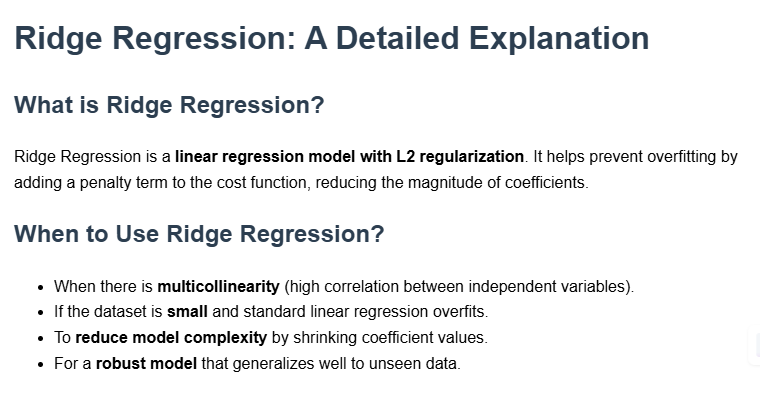

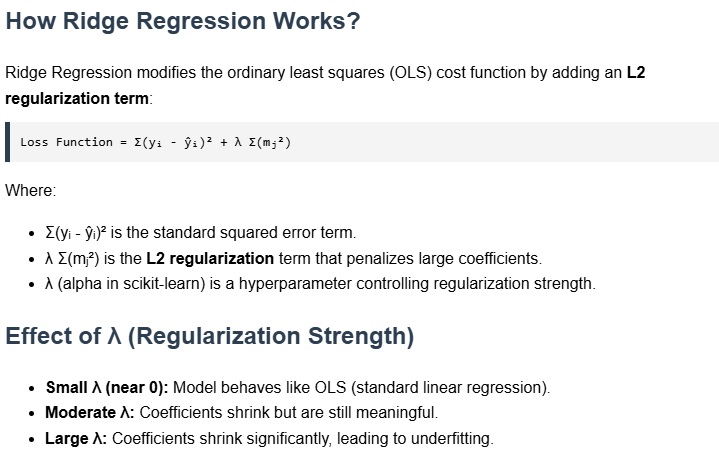



---




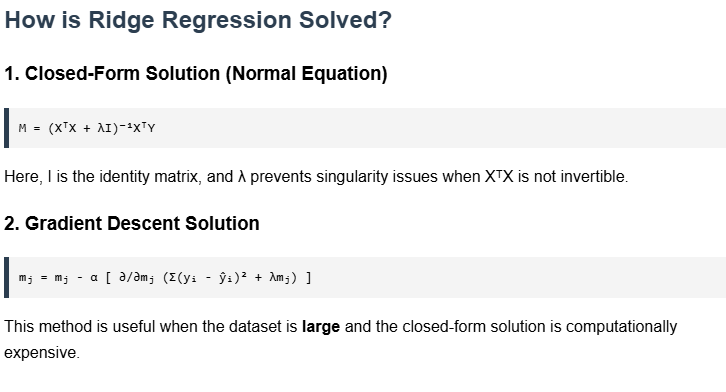

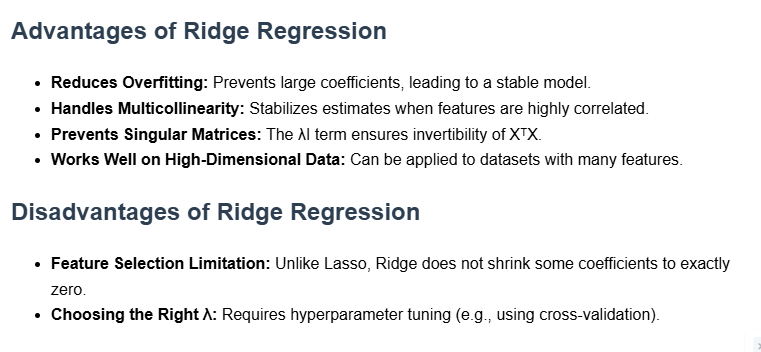